In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [24]:
def parsing(filePath):
    F = open(filePath,"r") 
    line = F.readlines()
    trainIteration = []
    trainF1 = []
    trainEM = []

    devIteration = []
    devF1 = []
    devEM = []
    devLoss = []

    trainIterLoss = []
    trainOverallLoss = []
    trainSmoothLoss = []
    trainGradNorm = []
    trainParamNorm = []

    for i in range(len(line)):
        textLine = line[i]
        textLine = textLine.strip()
    #     print(textLine)
        if(textLine.startswith('Epoch')) and "dev loss: " not in textLine and "Train F1 score: " in textLine:
            array = re.split(', ',textLine)
            for j in range(len(array)):
                itemArray = re.split(" ", array[j])
                if(itemArray[0] == 'Iter'):
                    trainIteration.append(int(itemArray[1]))
                if(itemArray[1] == 'F1'):
                    trainF1.append(float(itemArray[3])*100)
                if(itemArray[1] == 'EM'):
                    trainEM.append(float(itemArray[3])*100)
        if(textLine.startswith('Epoch')) and "dev loss: " not in textLine and "Dev F1 score: " in textLine:
            array = re.split(', ',textLine)
            for j in range(len(array)):
                itemArray = re.split(" ", array[j])
    #             print(itemArray)
                if(itemArray[0] == 'Iter'):
                    devIteration.append(int(itemArray[1]))
                if(itemArray[1] == 'F1'):
                    devF1.append(float(itemArray[3])*100)
                if(itemArray[1] == 'EM'):
                    devEM.append(float(itemArray[3])*100)
        if(textLine.startswith('Epoch') and "dev loss: " in textLine):
            array = re.split(", ", textLine)
            for i in range(len(array)):
                itemArray = re.split(" ", array[i])
                if(itemArray[0] == 'dev'):
                    devLoss.append(float(itemArray[2]))
        if(textLine.startswith('epoch') and "smoothed loss" in textLine):
            array = re.split(", ", textLine)

            for j in range(len(array)):
                itemArray = re.split(" ", array[j])         
                if(itemArray[0] == 'iter'):
                    trainIterLoss.append(int(itemArray[1]))
                    iterVal = int(itemArray[1])
                if(itemArray[0] == 'loss'):
                    trainOverallLoss.append(float(itemArray[1]))
                if(itemArray[0] == 'smoothed'):
                    trainSmoothLoss.append(float(itemArray[2]))
                if(itemArray[0] == 'grad'):
                    trainGradNorm.append(float(itemArray[2]))
                if(itemArray[0] == 'param'):
                    trainParamNorm.append(float(itemArray[2]))
    F.close()
    return devIteration, devLoss, trainIterLoss, trainSmoothLoss

### Parse through all the log files

In [25]:
devIterationBase, devBase, trainIterBase, trainBase = parsing("./logResults/logFile_BaseOnly.txt")
devIteration2, dev2, trainIter2, train2 = parsing("./logResults/logFile_BidafNoHighway.txt")
devIteration3, dev3, trainIter3, train3 = parsing("./logResults/logFile_BidafHighway.txt")
devIteration4, dev4, trainIter4, train4 = parsing("./logResults/logFile_Bidaf_LSTM.txt")
devIteration5, dev5, trainIter5, train5 = parsing("./logResults/logFile_charCNN_Bidaf_LSTM.txt")
devIteration6, dev6, trainIter6, train6 = parsing("./logResults/logFile_BidafNoHighway_SpanSmart.txt")

### Plot Test Loss for all configurations

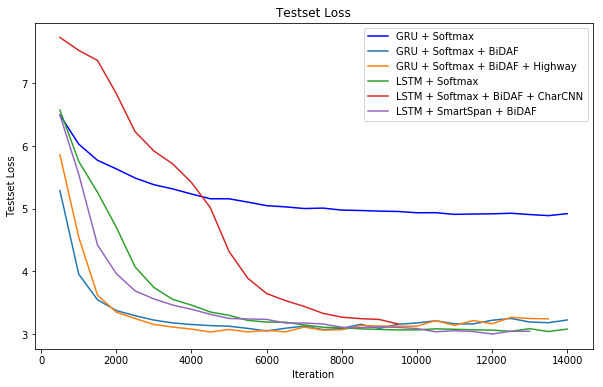

In [38]:
fig, ax1 = plt.subplots(figsize=(10,6))
# plt.subplot(1,2,1)
plt.plot(devIterationBase, devBase, 'b', label='GRU + Softmax')
plt.plot(devIteration2, dev2, label='GRU + Softmax + BiDAF')
plt.plot(devIteration3, dev3, label='GRU + Softmax + BiDAF + Highway')
plt.plot(devIteration4, dev4, label='LSTM + Softmax')
plt.plot(devIteration5, dev5, label='LSTM + Softmax + BiDAF + CharCNN')
plt.plot(devIteration6, dev6, label='LSTM + SmartSpan + BiDAF')
plt.xlabel("Iteration")
plt.ylabel("Testset Loss")
plt.title("Testset Loss")
plt.legend()
plt.savefig("ResultsAll_Test.png")
plt.show()
# plt.subplot(1,2,2)


### Plot Train Loss for all configurations

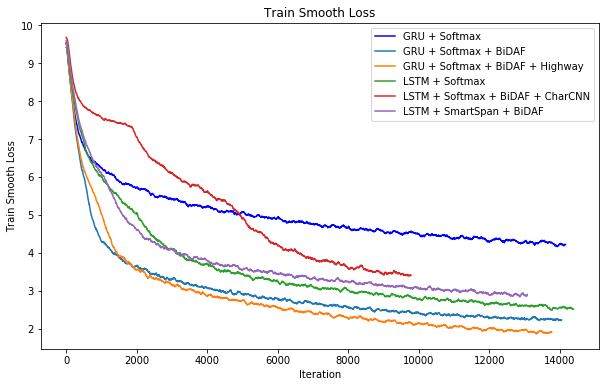

In [39]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.plot(trainIterBase, trainBase, 'b', label='GRU + Softmax')
plt.plot(trainIter2, train2, label='GRU + Softmax + BiDAF')
plt.plot(trainIter3, train3, label='GRU + Softmax + BiDAF + Highway')
plt.plot(trainIter4, train4, label='LSTM + Softmax')
plt.plot(trainIter5, train5, label='LSTM + Softmax + BiDAF + CharCNN')
plt.plot(trainIter6, train6, label='LSTM + SmartSpan + BiDAF')
plt.xlabel("Iteration")
plt.ylabel("Train Smooth Loss")
plt.title("Train Smooth Loss")
plt.legend()
# plt.plot(devIteration, trainSmoothLoss)
plt.savefig("ResultsAll_Train.png")
plt.show()

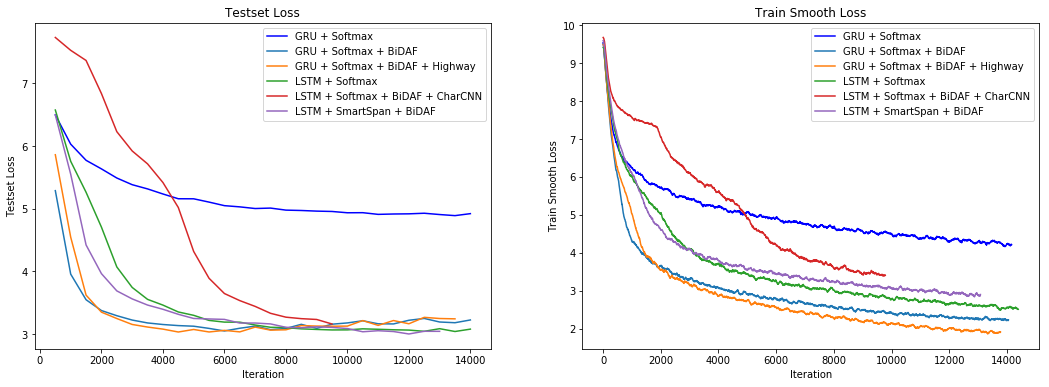

In [46]:
fig, ax1 = plt.subplots(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(devIterationBase, devBase, 'b', label='GRU + Softmax')
plt.plot(devIteration2, dev2, label='GRU + Softmax + BiDAF')
plt.plot(devIteration3, dev3, label='GRU + Softmax + BiDAF + Highway')
plt.plot(devIteration4, dev4, label='LSTM + Softmax')
plt.plot(devIteration5, dev5, label='LSTM + Softmax + BiDAF + CharCNN')
plt.plot(devIteration6, dev6, label='LSTM + SmartSpan + BiDAF')
plt.xlabel("Iteration")
plt.ylabel("Testset Loss")
plt.title("Testset Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(trainIterBase, trainBase, 'b', label='GRU + Softmax')
plt.plot(trainIter2, train2, label='GRU + Softmax + BiDAF')
plt.plot(trainIter3, train3, label='GRU + Softmax + BiDAF + Highway')
plt.plot(trainIter4, train4, label='LSTM + Softmax')
plt.plot(trainIter5, train5, label='LSTM + Softmax + BiDAF + CharCNN')
plt.plot(trainIter6, train6, label='LSTM + SmartSpan + BiDAF')
plt.xlabel("Iteration")
plt.ylabel("Train Smooth Loss")
plt.title("Train Smooth Loss")
plt.legend()
plt.savefig("Results_Both.png")
plt.show()